<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from keras.applications.vgg16 import preprocess_input
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_700/Train'
test_dir = '/content/drive/MyDrive/DR_700/Test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [6]:
# Load VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [11]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 1s 523ms/step


In [12]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 1s 526ms/step


Training SVM with LINEAR kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.50      0.47       105
           1       0.47      0.48      0.47       105
           2       0.29      0.30      0.29       105
           3       0.62      0.57      0.60       105
           4       0.60      0.57      0.59       105

    accuracy                           0.48       525
   macro avg       0.49      0.48      0.48       525
weighted avg       0.49      0.48      0.48       525

Confusion Matrix:
[[52 22 17  5  9]
 [22 50 25  4  4]
 [24 27 31 11 12]
 [ 8  6 16 60 15]
 [ 8  2 19 16 60]]
Accuracy: 0.4819047619047619
Sensitivity (Macro-average recall): 0.4819047619047619
Precision (Macro-average precision): 0.4870934215080796
F1 Score (Macro-average F1-score): 0.48400890983892986

Recall for class 0: 0.49523809523809526
Specificity for class 0: 0.8523809523809524

Recall for class 1: 0.47

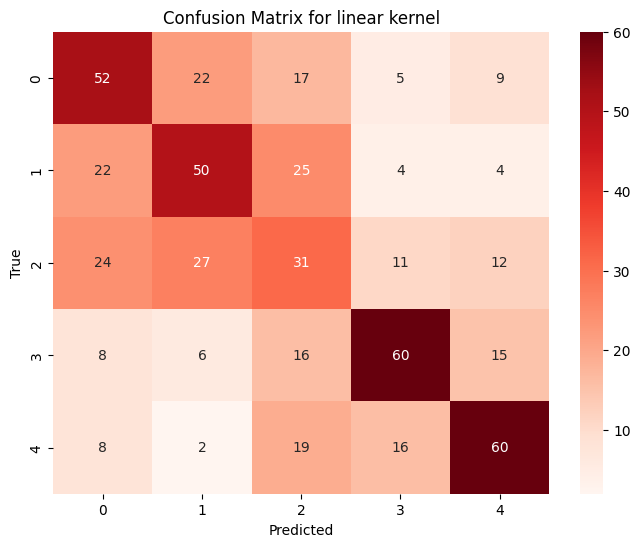

Training SVM with POLY kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.30      0.39       105
           1       0.45      0.72      0.55       105
           2       0.30      0.33      0.32       105
           3       0.67      0.49      0.56       105
           4       0.61      0.64      0.63       105

    accuracy                           0.50       525
   macro avg       0.52      0.50      0.49       525
weighted avg       0.52      0.50      0.49       525

Confusion Matrix:
[[31 37 22  6  9]
 [ 7 76 16  4  2]
 [12 34 35  9 15]
 [ 0 17 21 51 16]
 [ 4  6 22  6 67]]
Accuracy: 0.49523809523809526
Sensitivity (Macro-average recall): 0.49523809523809526
Precision (Macro-average precision): 0.5217177132392072
F1 Score (Macro-average F1-score): 0.4898221193989502

Recall for class 0: 0.29523809523809524
Specificity for class 0: 0.9452380952380952

Recall for class 1: 0.72380

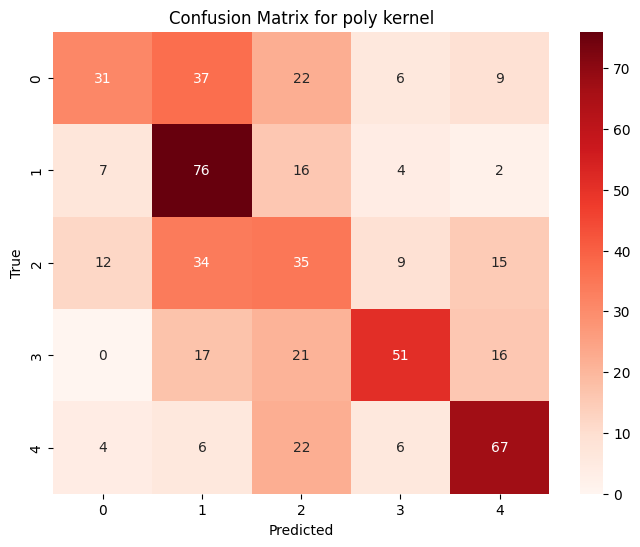

Training SVM with RBF kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.27      0.37       105
           1       0.44      0.70      0.54       105
           2       0.29      0.30      0.29       105
           3       0.62      0.46      0.53       105
           4       0.57      0.70      0.62       105

    accuracy                           0.48       525
   macro avg       0.51      0.48      0.47       525
weighted avg       0.51      0.48      0.47       525

Confusion Matrix:
[[28 38 23  6 10]
 [ 5 73 18  5  4]
 [11 32 31 11 20]
 [ 0 15 20 48 22]
 [ 2  7 16  7 73]]
Accuracy: 0.4819047619047619
Sensitivity (Macro-average recall): 0.4819047619047619
Precision (Macro-average precision): 0.5054850055760066
F1 Score (Macro-average F1-score): 0.4708171263007566

Recall for class 0: 0.26666666666666666
Specificity for class 0: 0.9571428571428572

Recall for class 1: 0.695238095

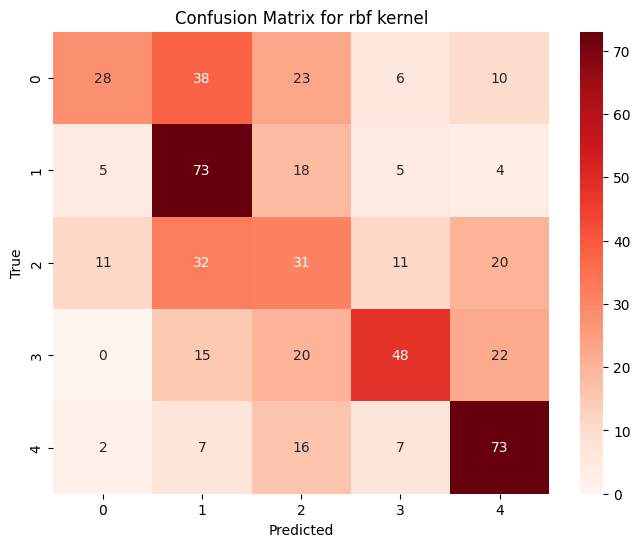

Training SVM with SIGMOID kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.19      0.29       105
           1       0.42      0.72      0.53       105
           2       0.26      0.24      0.25       105
           3       0.49      0.39      0.44       105
           4       0.51      0.64      0.57       105

    accuracy                           0.44       525
   macro avg       0.46      0.44      0.41       525
weighted avg       0.46      0.44      0.41       525

Confusion Matrix:
[[20 39 26  8 12]
 [ 3 76 14  7  5]
 [ 6 38 25 15 21]
 [ 3 18 17 41 26]
 [ 1 10 15 12 67]]
Accuracy: 0.4361904761904762
Sensitivity (Macro-average recall): 0.43619047619047613
Precision (Macro-average precision): 0.4578216705759541
F1 Score (Macro-average F1-score): 0.41456303586859916

Recall for class 0: 0.19047619047619047
Specificity for class 0: 0.969047619047619

Recall for class 1: 0.

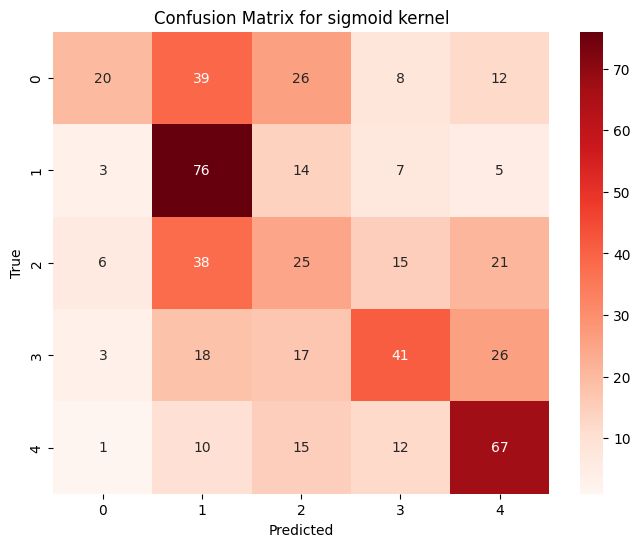

Training SVM with POLYNOMIAL_EXPONENTIAL kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.50      0.47       105
           1       0.47      0.48      0.47       105
           2       0.29      0.30      0.29       105
           3       0.62      0.57      0.60       105
           4       0.60      0.57      0.59       105

    accuracy                           0.48       525
   macro avg       0.49      0.48      0.48       525
weighted avg       0.49      0.48      0.48       525

Confusion Matrix:
[[52 22 17  5  9]
 [22 50 25  4  4]
 [24 27 31 11 12]
 [ 8  6 16 60 15]
 [ 8  2 19 16 60]]
Accuracy: 0.4819047619047619
Sensitivity (Macro-average recall): 0.4819047619047619
Precision (Macro-average precision): 0.4870934215080796
F1 Score (Macro-average F1-score): 0.48400890983892986

Recall for class 0: 0.49523809523809526
Specificity for class 0: 0.8523809523

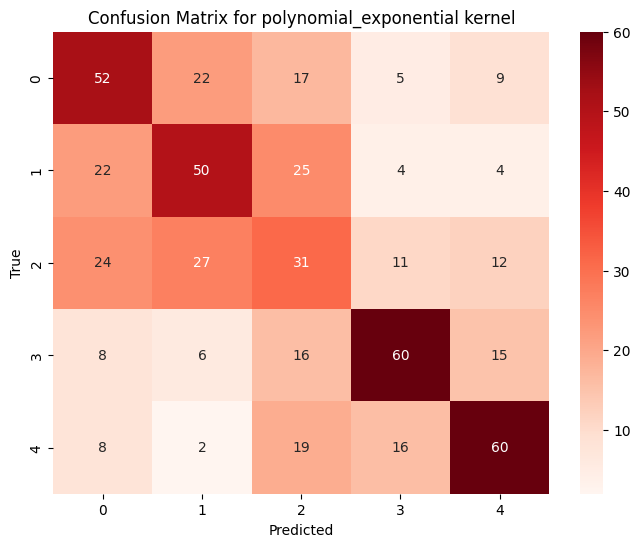

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
import seaborn as sns

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel.upper()} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))  # Classification report with precision, recall, F1-score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))  # Confusion matrix

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    # Compute recall for each class
    recalls = recall_score(y_test, y_pred, average=None)

    # Compute specificity for each class
    # Specificity = TN / (TN + FP)
    cm = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(cm.shape[0]):
        tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
        fp = np.sum(cm[:, i]) - cm[i, i]
        specificity.append(tn / (tn + fp))

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity (Macro-average recall): {sensitivity}')
    print(f'Precision (Macro-average precision): {precision}')
    print(f'F1 Score (Macro-average F1-score): {f1}\n')

    for i, (recall, specific) in enumerate(zip(recalls, specificity)):
        print(f'Recall for class {i}: {recall}')
        print(f'Specificity for class {i}: {specific}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()
